In [8]:
#Basic example of bayesian optimization

#George is a very simple Gaussian Process package with Bayesian Optimization
import george
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Our example: x range is between -2 and 4, true f(x) = sin(x)
x_star=np.linspace(-2,4,50)

#We need to create a Gaussian Process
#For our example, we will have a squared exponential kernel with lengthscale = 1 and sigma = 3
lengthscale=3
sigma=1
kernel=sigma*george.kernels.ExpSquaredKernel(metric=lengthscale,ndim=1)
gp=george.GP(kernel)

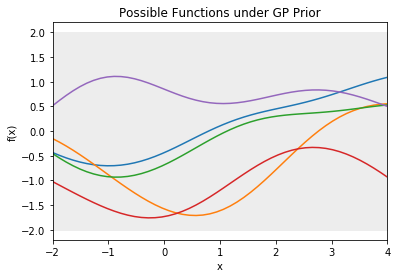

In [10]:
#Let's plot 5 possible functions equally likely based on our prior
gp_prior=gp.sample(x_star,size=5)
gp.compute(x_star)
cov=gp.get_matrix(x_star)
stdev=np.sqrt(cov.diagonal())
for i in range(0,5):
    plt.plot(x_star,gp_prior[i])
plt.fill_between(x_star, np.zeros(len(x_star))-2*stdev, np.zeros(len(x_star))+2*stdev,color="#ededed")
plt.xlim([-2,4])
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title("Possible Functions under GP Prior")
plt.show()

In [11]:
#Let's say we sample once
x_ev = np.array([-1])
#true y function  = sin(x)
y_ev=[np.sin(i) for i in x_ev]


gp.compute(x_ev)
[mu,var]=gp.predict(y_ev,x_star,return_var=True)
stdev=np.sqrt(var)

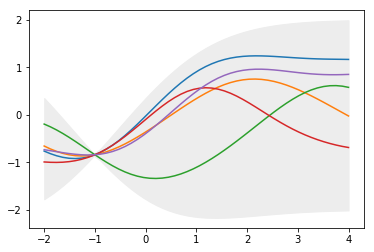

In [12]:
#Having updated our GP, let's plot the probable functions given our data and prior
gp_post=gp.sample_conditional(y_ev,x_star,size=5)
for i in range(0,5):
    plt.plot(x_star,gp_post[i])
plt.fill_between(x_star, mu-2*stdev, mu+2*stdev,color="#ededed")
plt.show()

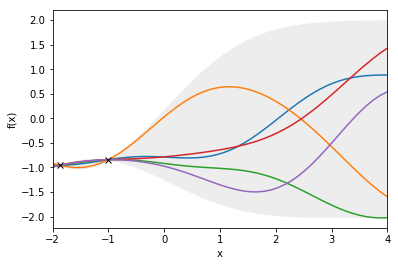

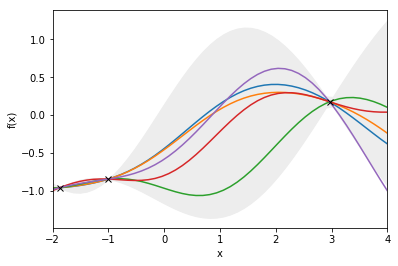

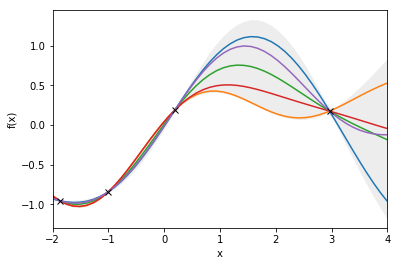

In [13]:
#now that we have the jist, let's just sample a couple of times
for i in range(0,3):
    x_ev=np.append(x_ev,np.random.uniform(-2,4))
    y_ev=[np.sin(i) for i in x_ev]
    
    gp.compute(x_ev)
    [m_new,var_new]=gp.predict(y_ev,x_star,return_var=True)
    stdev=np.sqrt(var_new)
    gp_post=gp.sample_conditional(y_ev,x_star,size=5)
    for j in range(0,5):
        plt.plot(x_star,gp_post[j])
    plt.plot(x_ev,y_ev,"kx")
    plt.xlim([-2,4])
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.fill_between(x_star, m_new-2*stdev, m_new+2*stdev, color="#ededed")
    plt.show()